In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn import metrics as sk_met
from sklearn.metrics import confusion_matrix
np.random.seed(1)

In [3]:
# Import the data
df1=pd.read_csv('Data/exoTrain.csv')
df2=pd.read_csv('Data/exoTest.csv')
# Let's take a look..
df2.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,...,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,1.008772,515.411351,738.046404,532.603246,739.618088,530.949807,729.591491,517.421404,720.723544,481.015211,...,60.027754,307.682825,88.976842,301.299895,105.121684,291.509561,256.656789,121.810035,224.806035,133.954544
std,0.093329,12592.950138,12622.940170,12545.065255,12591.933126,12512.976544,12572.187328,12454.094432,12525.496793,12397.610716,...,9528.594808,9588.586341,9497.373179,9611.024800,9611.076529,9654.581767,9362.719825,9487.642217,9483.948248,9700.731923
min,1.000000,-59421.000000,-14663.430000,-56580.000000,-10817.590000,-54545.000000,-7744.500000,-53580.000000,-6373.400000,-53832.000000,...,-89126.500000,-89432.070000,-89759.940000,-90182.630000,-90225.760000,-90595.000000,-86719.070000,-86911.500000,-87123.260000,-87476.940000
25%,1.000000,-22.230000,-22.912500,-22.985000,-18.662500,-20.980000,-21.245000,-22.675000,-22.200000,-22.685000,...,-9.602500,-12.842500,-15.222500,-14.350000,-17.370000,-18.272500,-24.000000,-27.360000,-36.855000,-29.475000
50%,1.000000,1.195000,0.410000,-1.125000,-0.880000,-1.495000,-2.650000,-4.330000,-3.910000,-3.890000,...,3.585000,3.795000,4.785000,3.910000,5.575000,7.150000,-4.385000,-4.995000,-5.135000,-3.785000
75%,1.000000,98.317500,89.710000,89.827500,73.257500,66.947500,45.147500,38.850000,37.150000,30.670000,...,23.445000,20.472500,25.582500,28.767500,27.455000,35.810000,17.755000,11.745000,12.265000,13.205000
max,2.000000,290882.500000,290653.500000,290554.000000,290486.500000,290289.000000,289982.500000,289197.500000,288520.500000,287404.500000,...,198420.000000,197888.500000,199639.000000,202007.000000,203730.500000,205924.000000,203193.000000,205050.000000,206884.500000,211488.500000


Shape of Xtrain: (5087, 3197) 
Shape of ytrain: (5087,)


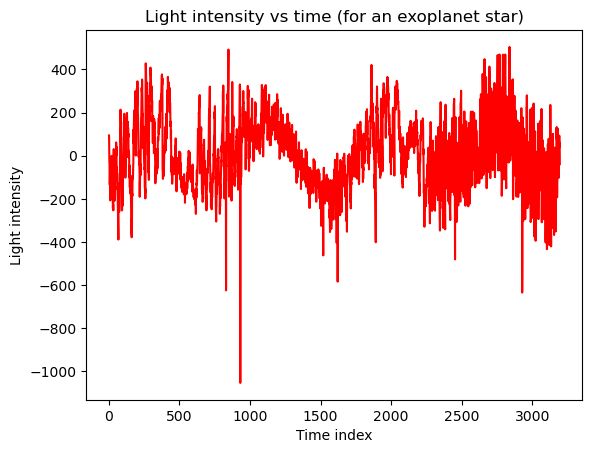

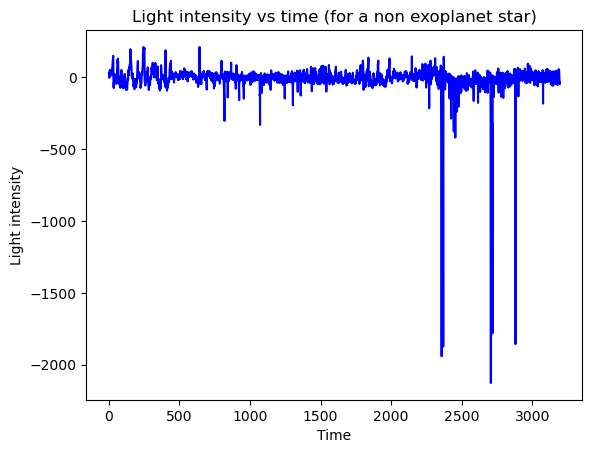

In [4]:
train_data=np.array(df1,dtype=np.float32)
test_data=np.array(df2,dtype=np.float32)


# Separate data and label
ytrain=train_data[:,0]
Xtrain=train_data[:,1:]

ytest=test_data[:,0]
Xtest=test_data[:,1:]

m=0   # A chosen exoplanet host star's index
n=100 # A chosen non-exoplanet host star's index

print('Shape of Xtrain:',np.shape(Xtrain),'\nShape of ytrain:',np.shape(ytrain))


plt.plot(Xtrain[m],'r')
plt.title('Light intensity vs time (for an exoplanet star)')
plt.xlabel('Time index')
plt.ylabel('Light intensity')
plt.show()

plt.plot(Xtrain[n],'b')
plt.title('Light intensity vs time (for a non exoplanet star)')
plt.xlabel('Time')
plt.ylabel('Light intensity')
plt.show()

In [6]:
# reshaping to give as input to the RNN:
Xtrain_rnn = np.reshape(Xtrain,(Xtrain.shape[0],Xtrain.shape[1],1))
Xtest_rnn = np.reshape(Xtest,(Xtest.shape[0],Xtest.shape[1],1))
print('Shape of Xtrain:',np.shape(Xtrain_rnn),'\nShape of ytrain:',np.shape(ytrain))

Shape of Xtrain: (5087, 3197, 1) 
Shape of ytrain: (5087,)


In [21]:
# Simple RNN Model:
def Simple_RNN():
    model = keras.Sequential()
    model.add(keras.layers.SimpleRNN(32,input_shape=(Xtrain_rnn.shape[1],1)))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])
    return model


# Create the model instance
model = Simple_RNN()

# Training:
history = model.fit(Xtrain_rnn, ytrain, epochs=20, batch_size=64, verbose=1)


# estimator=keras.wrappers.scikit_learn.KerasClassifier(build_fn=Simple_RNN,epochs=20,batch_size=64,verbose=1)

# # Training:
# history=estimator.fit(Xtrain_rnn,ytrain)

Epoch 1/20
80/80 [==============================] - 31s 370ms/step - loss: 0.6644 - acc: 0.6029
Epoch 2/20
80/80 [==============================] - 30s 373ms/step - loss: 0.2599 - acc: 0.8986
Epoch 3/20
80/80 [==============================] - 31s 385ms/step - loss: 0.0854 - acc: 0.9593
Epoch 4/20
80/80 [==============================] - 31s 385ms/step - loss: 0.0616 - acc: 0.9632
Epoch 5/20
80/80 [==============================] - 30s 369ms/step - loss: 0.0411 - acc: 0.9648
Epoch 6/20
80/80 [==============================] - 30s 370ms/step - loss: 0.0935 - acc: 0.9434
Epoch 7/20
80/80 [==============================] - 30s 375ms/step - loss: 0.0470 - acc: 0.9597
Epoch 8/20
80/80 [==============================] - 30s 376ms/step - loss: 0.0028 - acc: 0.9754
Epoch 9/20
80/80 [==============================] - 30s 377ms/step - loss: 0.0138 - acc: 0.9685
Epoch 10/20
80/80 [==============================] - 31s 383ms/step - loss: 0.0435 - acc: 0.9601
Epoch 11/20
80/80 [====================

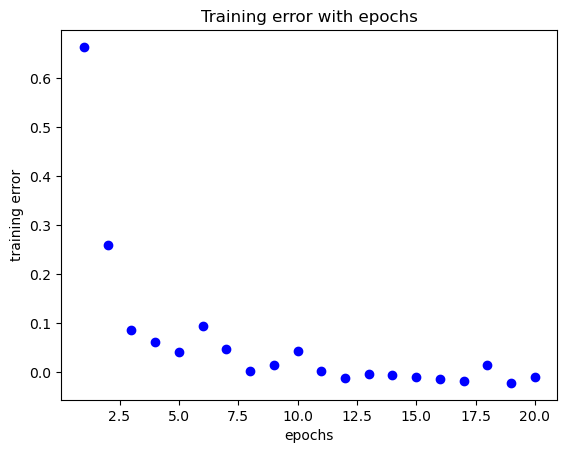

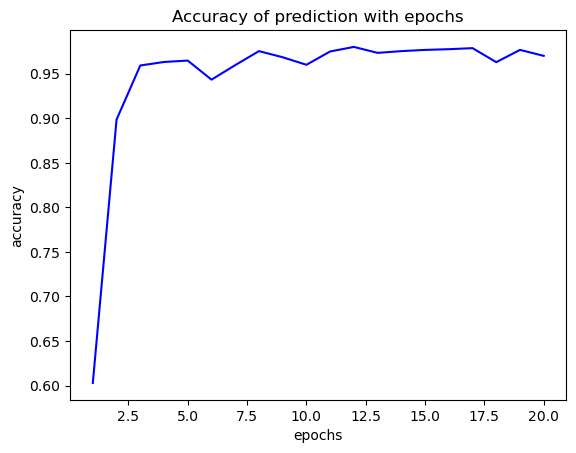

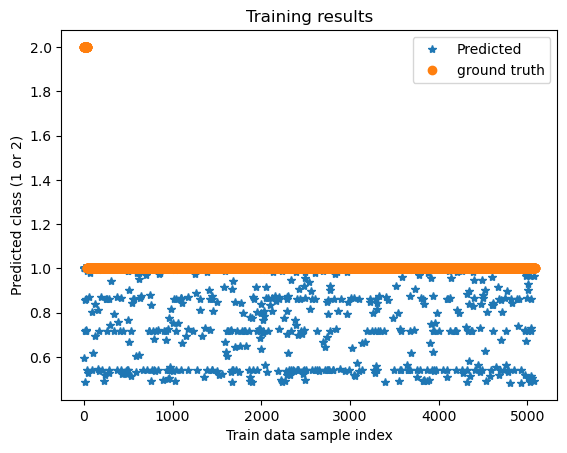

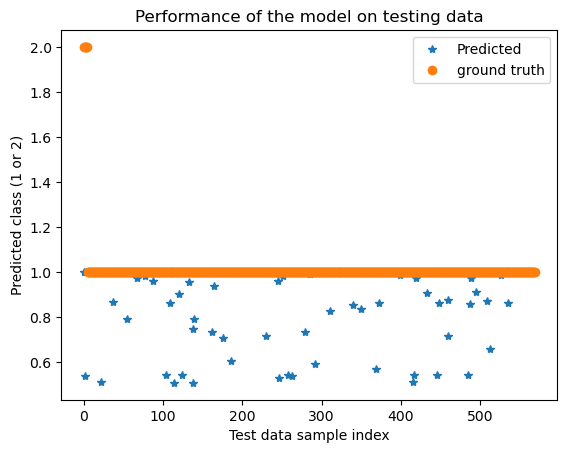

In [22]:
loss=history.history['loss']
acc=history.history['acc']

epochs=range(1,len(loss)+1)
plt.title('Training error with epochs')
plt.plot(epochs,loss,'bo',label='training loss')
plt.xlabel('epochs')
plt.ylabel('training error')
plt.show()

plt.plot(epochs,acc,'b',label='accuracy')
plt.title('Accuracy of prediction with epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# make predictions
trainPredict = model.predict(Xtrain_rnn,verbose=0)
testPredict = model.predict(Xtest_rnn,verbose=0)

plt.title('Training results')
plt.plot(trainPredict,'*',label='Predicted')
plt.plot(ytrain,'o',label='ground truth')
plt.xlabel('Train data sample index')
plt.ylabel('Predicted class (1 or 2)')
plt.legend()
plt.show()


plt.title('Performance of the model on testing data')
plt.plot(testPredict,'*',label='Predicted')
plt.plot(ytest,'o',label='ground truth')
plt.xlabel('Test data sample index')
plt.ylabel('Predicted class (1 or 2)')
plt.legend()
plt.show()